## Exercise 7.2 - TD Error Sum Algorithm 

With an n-step method, the value estimates do change from step to step, so an algorithm
that used the sum of TD errors (see previous exercise) in place of the error in (7.2)
would actually be a slightly different algorithm. Would it be a better algorithm or a
worse one? Devise and program a small experiment to answer this question empirically.

In [1]:
! pip3 -q install numpy matplotlib gym

In [2]:
import gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import walk
from td import td_on_policy_prediction

### Online and TD Error Sum $n$-Step Algorithms on Random Walk

Online TD($n$) algorithm updates the value function during the episode and always uses the latest
available value. TD Error Sum variant keeps accumulating and summing TD errors for each state
and changes the value function at the end of the episode with a single large update.

The following results are obtained by running the Random Walk environment from Example 6.2. 
Online version of the algorithm performs much better and is stable across much larger range
of learning rates $\alpha$. The result holds also across a reasonable large range of $n$-steps.

The reason why TD error sum variant performs worse is that the error sum accumulated over the
duration of the episode gets "stale". When states are frequently re-visited during an episode,
as is the case of the Random Walk which frequently steps back and forth, the updates of the
TD error sum version become too large, start to suffer from noise and eventually completely
destabilize the learning process.

If the learning rate is small or if the environment doesn't frequently re-visit the same state,
value function updates of both methods are very close to each another and in the limit of 
$\alpha \rightarrow 0$ become identical.

In [3]:
env = gym.make('RandomWalk-v0')
policy = np.ones([env.observation_space.n, env.action_space.n], dtype=float)
size = env.observation_space.n

n = 4
history0 = td_on_policy_prediction(env, policy, n=n, num_episodes=10, alpha=0.1, tderr=False)
history1 = td_on_policy_prediction(env, policy, n=n, num_episodes=10, alpha=0.1, tderr=True)

---------------------------
Episode 0
Step: 0 | State: 2 | Action: 1 | Next State: 3 | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5]
Step: 1 | State: 3 | Action: -1 | Next State: 2 | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5]
Step: 2 | State: 2 | Action: 1 | Next State: 3 | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5]
Step: 3 | State: 3 | Action: 1 | Next State: 4 | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5]
Step: 4 | State: 4 | Action: 1 | Next State: 4 | Reward: 1 | State Values: [0.5  0.5  0.5  0.55 0.5 ]
Step: 5 | State: 4 | Action: 1 | Next State: 4 | Reward: 1 | State Values: [0.5  0.5  0.55 0.55 0.5 ]
Step: 6 | State: 4 | Action: 1 | Next State: 4 | Reward: 1 | State Values: [0.5   0.5   0.55  0.595 0.5  ]
Step: 7 | State: 4 | Action: 1 | Next State: 4 | Reward: 1 | State Values: [0.5   0.5   0.55  0.595 0.55 ]
---------------------------
Episode 1
Step: 0 | State: 2 | Action: -1 | Next State: 1 | Reward: 0 | State Values: [0.5   0.5   0.55  0.595 0.55 ]
Step: 1 |

C:\Users\cafaya\.conda\envs\RLExercises\Lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
C:\Users\cafaya\.conda\envs\RLExercises\Lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
C:\Users\cafaya\.conda\envs\RLExercises\Lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'int'>`
  logger.warn(
C:\Users\cafaya\.conda\envs\RLExercises\Lib\site-packages\gym\utils\passive_env_checker.py:233: Depreca

In [4]:
v_star = np.arange(1, size + 1) / (size + 1)

In [5]:
v_star

array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333])

In [6]:
history0

[array([0.5  , 0.5  , 0.55 , 0.595, 0.55 ]),
 array([0.505     , 0.5249755 , 0.545855  , 0.66571705, 0.635095  ]),
 array([0.4545    , 0.47247795, 0.48759255, 0.58647861, 0.635095  ]),
 array([0.4545    , 0.47247795, 0.53883329, 0.62783074, 0.6715855 ]),
 array([0.4545    , 0.47247795, 0.59689766, 0.6985429 , 0.70442695]),
 array([0.4545    , 0.545576  , 0.64688553, 0.72868861, 0.73398425]),
 array([0.4545    , 0.5803674 , 0.69003586, 0.78023778, 0.76058583]),
 array([0.4545    , 0.5803674 , 0.72103228, 0.802214  , 0.78452725]),
 array([0.47848791, 0.61830317, 0.71150721, 0.82182376, 0.82546707]),
 array([0.46480207, 0.5276799 , 0.58863809, 0.77163355, 0.82546707])]

In [7]:
policy

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

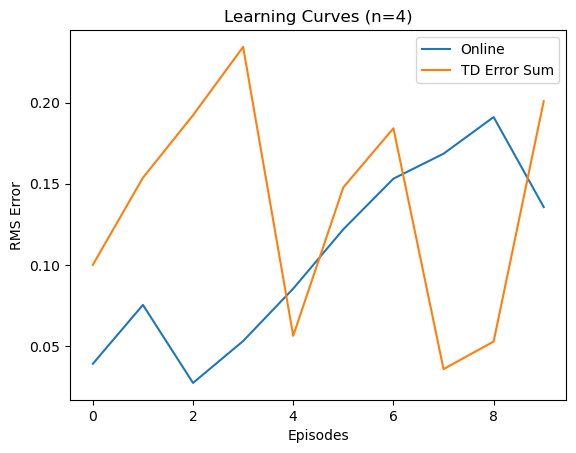

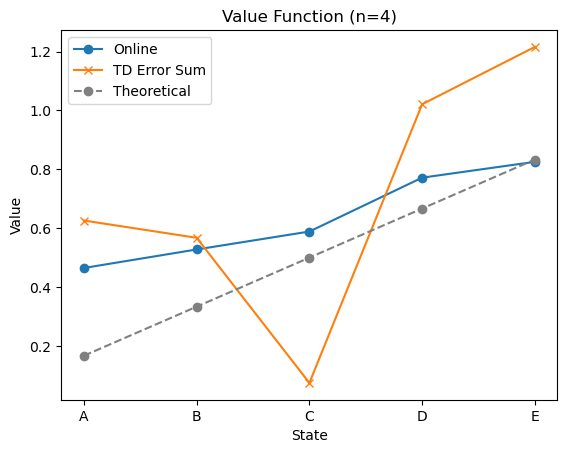

In [8]:
plt.figure()
plt.title(f"Learning Curves (n={n})")
plt.xlabel("Episodes")
plt.ylabel("RMS Error")
rms0 = np.sqrt((np.mean(history0 - v_star, axis=1) ** 2))
rms1 = np.sqrt((np.mean(history1 - v_star, axis=1) ** 2))
plt.plot(rms0, label='Online')
plt.plot(rms1, label='TD Error Sum')
plt.legend()
plt.show()


plt.figure()
plt.title(f"Value Function (n={n})")
plt.xlabel("State")
plt.ylabel("Value")
plt.xticks(range(size + 1), [chr(ord('A') + i) for i in range(size + 1)])
plt.plot(history0[-1], 'o-', label='Online')
plt.plot(history1[-1], 'x-', label='TD Error Sum')
plt.plot(v_star, 'o--', color='gray', label='Theoretical')
plt.legend()
plt.show()


In [11]:
ns = [2, 4, 8]
alphas = np.linspace(0, 0.5, num=20)
rms10int0 = np.zeros([len(ns), len(alphas)])
rms10int1 = np.zeros([len(ns), len(alphas)])

for i, n in enumerate(ns):
    for j, alpha in enumerate(alphas):
        env.seed(7)
        history0 = td_on_policy_prediction(env, policy, n=n, num_episodes=10,
                                           alpha=alpha, tderr=False)
        rmsint0 = np.sqrt((history0 - v_star) ** 2).mean()
        rms10int0[i, j] = rmsint0
        
        env.seed(7)
        history1 = td_on_policy_prediction(env, policy, n=n, num_episodes=10,
                                           alpha=alpha, tderr=True)
        rmsint1 = np.sqrt((history1 - v_star) ** 2).mean()
        rms10int1[i, j] = rmsint1

---------------------------
Episode 0
Step: 0 | State: 2 | Action: 1 | Next State: 3 | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5]
Step: 1 | State: 3 | Action: -1 | Next State: 2 | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5]
Step: 2 | State: 2 | Action: 1 | Next State: 3 | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5]
Step: 3 | State: 3 | Action: -1 | Next State: 2 | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5]
Step: 4 | State: 2 | Action: -1 | Next State: 1 | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5]
Step: 5 | State: 1 | Action: -1 | Next State: 0 | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5]
Step: 6 | State: 0 | Action: 1 | Next State: 1 | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5]
Step: 7 | State: 1 | Action: 1 | Next State: 2 | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5]
Step: 8 | State: 2 | Action: -1 | Next State: 1 | Reward: 0 | State Values: [0.5 0.5 0.5 0.5 0.5]
Step: 9 | State: 1 | Action: 1 | Next State: 2 | Reward: 0 | State Values: [0.5 0.5 

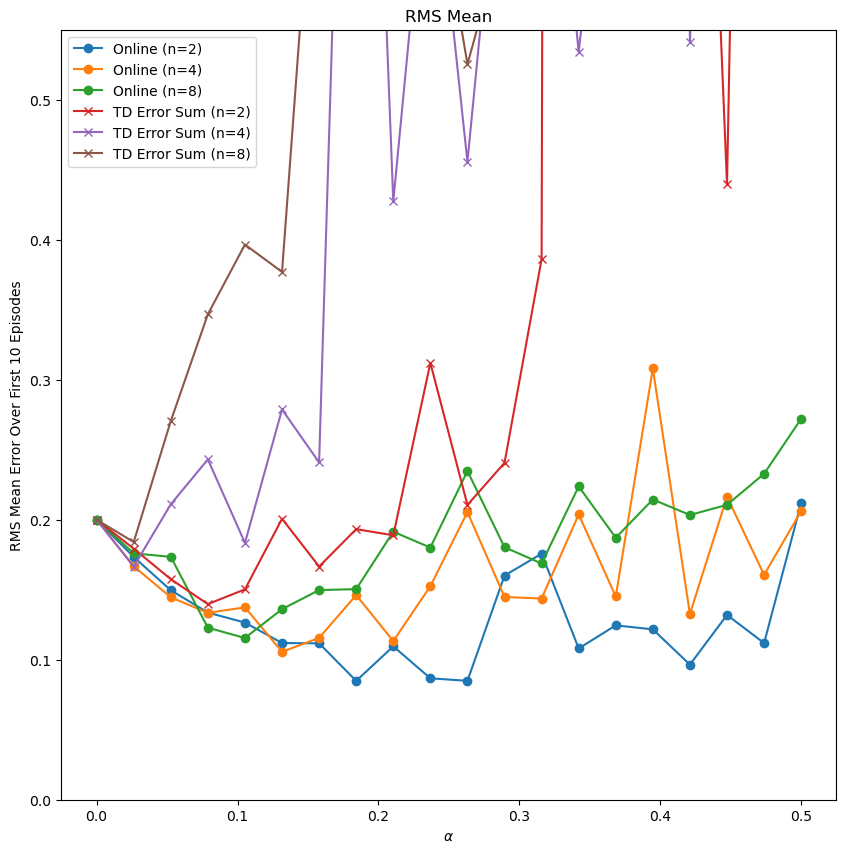

In [12]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.figure()
plt.title(f"RMS Mean")
plt.xlabel(r"$\alpha$"); plt.ylim([0, 0.55])
plt.ylabel("RMS Mean Error Over First 10 Episodes")
for i, n in enumerate(ns):
    plt.plot(alphas, rms10int0[i, :], 'o-', label=f'Online (n={n})')
for i, n in enumerate(ns):
    plt.plot(alphas, rms10int1[i, :], 'x-', label=f'TD Error Sum (n={n})')
plt.legend(loc=0)
plt.show()